# Welcome to this lovely notebook. Here we are going to explore the data of private and business vehicles from The Ministry of Transportation of Israel
* The [link](https://data.gov.il/dataset/private-and-commercial-vehicles) to the site.

* The data last updated on 29/03/2024

# Introduction

The datasets below contain official information of license numbers of the private active vehicles from the year of manufacture 1996 and above and the license numbers of the commercial active vehicles weighing up to 3,500 kg from the year of manufacture 1998 and above.

<p><img src="https://govextra.gov.il/media/b2foeo4j/%D7%A9%D7%99%D7%A8%D7%95%D7%AA-%D7%A2%D7%93%D7%9B%D7%95%D7%A0%D7%99%D7%9D-%D7%91%D7%A2%D7%A7%D7%91%D7%95%D7%AA-%D7%94%D7%9E%D7%A6%D7%91-%D7%94%D7%91%D7%99%D7%98%D7%97%D7%95%D7%A0%D7%99.jpg" alt="Drive safe!"></p>

The following project is intended to deepdive into Israel's car lake with the help of Pandas and Polars libraries (with the usage of other packages, such as seaborn and matplotlib)

Two datasets (on is an extention of the other one) containing some information about private and businnes vihecles were downloaded from the oficial gov.il site for EDA.

The content of both datasets can be seen below:

1. **data_part_1:**

       'mispar_rechev' - vehicle number
       'tozeret_cd' - manufacturer code
       'sug_degem' - model type
       'tozeret_nm' - manufacturer name
       'degem_cd' - model code
       'degem_nm' - model name
       'ramat_gimur' - maturnity level
       'ramat_eivzur_betihuty' - safety upgrade status
       'kvutzat_zihum' - emission group
       'shnat_yitzur' - manufacture year
       'degem_manoa' - engine model
       'mivchan_acharon_dt' - last test date
       'tokef_dt' - validity date
       'baalut' - ownership
       'misgeret' - car shassis number
       'tzeva_cd' - color code
       'tzeva_rechev' - vehicle color
       'zmig_kidmi' - front types
       'zmig_ahori' - back types
       'sug_delek_nm' - fuel type
       'horaat_rishum' - registration instruction
       'moed_aliya_lakvish' - road entry date
       'kinuy_mishari' - commercial nickname
       
2. **data_part_2:**

       'mispar_rechev'- vehicle number
       'tozeret_cd' - manufacturer code
       'sug_degem' - model type
       'degem_cd' - model code
       'kod_omes_tzmig_kidmi' - front axle load code
       'kod_omes_tzmig_ahori' - rear axle load code
       'kod_mehirut_tzmig_kidmi' - fron axle speed code
       'kod_mehirut_tzmig_ahori' - rear axle speed code
       'grira_nm' - towing capability
       
       
The names of the columns, of course, will be replaced with other proper English names later.

# Goal
My goal is to conduct a comprehensive analysis of the car dataset to uncover insights into the characteristics and trends of vehicles in Israel.
This analysis will explore various aspects such as the distribution of car makes and models, the age and type of vehicles, their geographic distribution, and compliance with road safety regulations. The objective is to provide a detailed overview of the automotive landscape in Israel, which can inform policy decisions, market strategies, and consumer behavior analysis.

## The information about the columns in the data

# The project will consist of the following parts:

1. Solving issues with opening and reading the data (due to some Hebrew words appearing in a few columns, errors with encoding popped up)
2. Preliminary Data Inspection
3. Data manipulation and preparation for cleaning
4. Data Cleaning
5. Data Exploration and Visualization


In [ ]:
#Let's import all the required packages and set everything that we will need for work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)

## 1. Solving loading Issues

### A small comment about difficulties with the dataset due to Hebrew text appearing  in some columns. The following was done:
* 1. Sublime editor was downloaded.
* 2. The files were opened and then reopened and saved with 'windows-1255' encoding.

## 2. Loading data and preliminary data inspection

In [ ]:
%%time
data_part_1 = pd.read_csv('transport_part_1.csv', header=0, encoding='windows-1255', delimiter='|')

CPU times: total: 6.39 s
Wall time: 20 s


In [ ]:
%%time
data_part_2 = pd.read_csv('transport_part_2.csv', header=0, encoding='windows-1255', delimiter='|')

CPU times: total: 2.48 s
Wall time: 6.05 s


#### data_part_1

In [ ]:
data_part_1.shape

(3840766, 23)

In [ ]:
data_part_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840766 entries, 0 to 3840765
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   mispar_rechev          int64  
 1   tozeret_cd             int64  
 2   sug_degem              object 
 3   tozeret_nm             object 
 4   degem_cd               int64  
 5   degem_nm               object 
 6   ramat_gimur            object 
 7   ramat_eivzur_betihuty  float64
 8   kvutzat_zihum          float64
 9   shnat_yitzur           int64  
 10  degem_manoa            object 
 11  mivchan_acharon_dt     object 
 12  tokef_dt               object 
 13  baalut                 object 
 14  misgeret               object 
 15  tzeva_cd               int64  
 16  tzeva_rechev           object 
 17  zmig_kidmi             object 
 18  zmig_ahori             object 
 19  sug_delek_nm           object 
 20  horaat_rishum          float64
 21  moed_aliya_lakvish     object 
 22  kinuy_mishari     

In [ ]:
# We see that mispar_rechev is a column with unique values which represents each vehicle (along with misgeret column, almost).
data_part_1.nunique()

mispar_rechev            3840766
tozeret_cd                   271
sug_degem                      2
tozeret_nm                   271
degem_cd                    3974
degem_nm                    9221
ramat_gimur                 4660
ramat_eivzur_betihuty          8
kvutzat_zihum                 15
shnat_yitzur                  29
degem_manoa                 5736
mivchan_acharon_dt          1360
tokef_dt                     823
baalut                         5
misgeret                 3840763
tzeva_cd                     100
tzeva_rechev                 100
zmig_kidmi                  6625
zmig_ahori                  7054
sug_delek_nm                   6
horaat_rishum              10210
moed_aliya_lakvish           200
kinuy_mishari               3981
dtype: int64

In [ ]:
# taking a look at the number of nulls in the dataset
# We see 3 columns with a sigificant number of nulls which we'll take a look at and decide what to do with them later
data_part_1.isnull().sum()

mispar_rechev                  0
tozeret_cd                     0
sug_degem                      0
tozeret_nm                     0
degem_cd                       0
degem_nm                       0
ramat_gimur                72262
ramat_eivzur_betihuty    2491528
kvutzat_zihum             406942
shnat_yitzur                   0
degem_manoa                    0
mivchan_acharon_dt             0
tokef_dt                       1
baalut                         0
misgeret                       0
tzeva_cd                       0
tzeva_rechev                   0
zmig_kidmi                   138
zmig_ahori                137615
sug_delek_nm                   0
horaat_rishum             974520
moed_aliya_lakvish        378704
kinuy_mishari                114
dtype: int64

In [ ]:
# As we see, in data_part_1 there are four columns with Hebrew text in them which we will work on later
data_part_1.head()

,mispar_rechev,tozeret_cd,sug_degem,tozeret_nm,degem_cd,degem_nm,ramat_gimur,ramat_eivzur_betihuty,kvutzat_zihum,shnat_yitzur,degem_manoa,mivchan_acharon_dt,tokef_dt,baalut,misgeret,tzeva_cd,tzeva_rechev,zmig_kidmi,zmig_ahori,sug_delek_nm,horaat_rishum,moed_aliya_lakvish,kinuy_mishari
0,7993778,481,P,יונדאי קוריאה,15,DH41C,INSPIRE,NaN,15.0,2012,G4FG,2024-03-04,2025-03-28,פרטי,KMHDH41CBCU464082,93,כסוף כהה,195/65R15,195/65R15,בנזין,NaN,2012-3,I35
1,2481466,845,P,יונדאי טורקיה,72,CM41C,GL,NaN,NaN,2008,G4ED,2024-03-04,2025-03-24,פרטי,NLHCM41CP8Z096516,25,כסף,185/65R14,185/65R14,בנזין,NaN,NaN,ACCENT
2,6120469,253,P,יונדאי צ'כיה,21,DB51D,INSPIRE,NaN,15.0,2009,G4FC,2024-03-04,2024-09-28,פרטי,TMADB51DP9J041571,80,שנהב לבן,185/65R15,NaN,בנזין,NaN,2009-9,I30
3,7151374,885,P,קיה קוריאה,1011,FH2213,LX,NaN,15.0,2011,G4FC,2024-03-04,2025-02-02,פרטי,KNAFU411BB5364267,25,כסף,195/65R15,195/65R15,בנזין,NaN,2011-2,FORTE
4,5410413,299,P,סוזוקי הונגריה,41,EXB32,GLS,NaN,13.0,2012,K12B,2024-03-04,2025-02-22,פרטי,TSMEXB32S00564280,50,אדום,185/60R15,185/60R15,בנזין,NaN,2012-2,SPLASH


In [ ]:
data_part_1.tail()

,mispar_rechev,tozeret_cd,sug_degem,tozeret_nm,degem_cd,degem_nm,ramat_gimur,ramat_eivzur_betihuty,kvutzat_zihum,shnat_yitzur,degem_manoa,mivchan_acharon_dt,tokef_dt,baalut,misgeret,tzeva_cd,tzeva_rechev,zmig_kidmi,zmig_ahori,sug_delek_nm,horaat_rishum,moed_aliya_lakvish,kinuy_mishari
3840761,4903439,496,M,סיטרואן ספרד,37,7NBHW6/3,COMFORT,NaN,12.0,2016,BH02,2022-09-12,2023-09-28,פרטי,VF77NBHW6GJ723507,80,שנהב לבן,205/65R15,205/65R15,דיזל,160379.0,2016-9,BERLINGO
3840762,3100956,413,M,טויוטה יפן,850,KDJ120L-GKPEYW,LUXURY,NaN,NaN,2004,1KD,2023-08-09,2024-09-06,פרטי,JTEBZ29J140024217,65,זהב,265\65 R17,265\65 R17,דיזל,NaN,NaN,LAND CRISER
3840763,7595161,481,M,יונדאי קוריאה,2,NM81X,GLS,NaN,NaN,2007,J3,2022-10-25,2023-10-21,פרטי,KMHNM81XP7U205982,10,שחור,255/65R16,255/65R16,דיזל,NaN,NaN,TERRACAN
3840764,7208331,416,P,קיה סלובקיה,57,PC81BB,LX,NaN,15.0,2014,G4NC,2023-07-09,2024-07-05,פרטי,U5YPC81BBEL497293,80,שנהב לבן,225/60R17,225/60R17,בנזין,140299.0,2014-7,SPORTAGE
3840765,6622553,676,P,סקודה צ'כיה,285,5E33DD,AMBITION,NaN,14.0,2014,CJZ,2024-03-03,2024-11-22,סוחר,TMBAB7NE0F0096040,27,אפור מטל,205/55 R16,205/55 R16,בנזין,140049.0,2014-11,OCTAVIA


#### data_part_2

In [ ]:
data_part_2.shape

(3840766, 9)

In [ ]:
# data_part_2 contains 9 columns and the same number of rows like data_part_1
data_part_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840766 entries, 0 to 3840765
Data columns (total 9 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   mispar_rechev            int64 
 1   tozeret_cd               int64 
 2   sug_degem                object
 3   degem_cd                 int64 
 4   kod_omes_tzmig_kidmi     int64 
 5   kod_omes_tzmig_ahori     int64 
 6   kod_mehirut_tzmig_kidmi  object
 7   kod_mehirut_tzmig_ahori  object
 8   grira_nm                 object
dtypes: int64(5), object(4)
memory usage: 263.7+ MB


In [ ]:
# We see that mispar_rechev is a column with unique values which represents each vehicle like in data_part_1
data_part_2.nunique()

mispar_rechev              3840766
tozeret_cd                     271
sug_degem                        2
degem_cd                      3974
kod_omes_tzmig_kidmi           126
kod_omes_tzmig_ahori           130
kod_mehirut_tzmig_kidmi         66
kod_mehirut_tzmig_ahori         66
grira_nm                         4
dtype: int64

In [ ]:
# taking a look at the number of nulls in the dataset
# We see 3 columns with a sigificant number of nulls which we'll take a look at and decide what to do with them later
data_part_2.isnull().sum()

mispar_rechev                   0
tozeret_cd                      0
sug_degem                       0
degem_cd                        0
kod_omes_tzmig_kidmi            0
kod_omes_tzmig_ahori            0
kod_mehirut_tzmig_kidmi    466633
kod_mehirut_tzmig_ahori    466633
grira_nm                        0
dtype: int64

In [ ]:
data_part_2.head()

,mispar_rechev,tozeret_cd,sug_degem,degem_cd,kod_omes_tzmig_kidmi,kod_omes_tzmig_ahori,kod_mehirut_tzmig_kidmi,kod_mehirut_tzmig_ahori,grira_nm
0,7993778,481,P,15,91,91,H,H,אין וו גרירה
1,2481466,845,P,72,0,0,NaN,NaN,אין וו גרירה
2,6120469,253,P,21,88,0,H,H,אין וו גרירה
3,7151374,885,P,1011,91,91,H,H,אין וו גרירה
4,5410413,299,P,41,84,84,H,H,אין וו גרירה


In [ ]:
data_part_2.tail()

,mispar_rechev,tozeret_cd,sug_degem,degem_cd,kod_omes_tzmig_kidmi,kod_omes_tzmig_ahori,kod_mehirut_tzmig_kidmi,kod_mehirut_tzmig_ahori,grira_nm
3840761,70881902,839,P,237,91,91,V,V,אין וו גרירה
3840762,21879603,839,P,237,91,91,V,V,אין וו גרירה
3840763,21719403,839,P,234,95,95,V,V,אין וו גרירה
3840764,70681502,839,P,234,95,95,V,V,אין וו גרירה
3840765,56085103,413,P,297,95,95,V,V,אין וו גרירה


In [ ]:
data_part_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840766 entries, 0 to 3840765
Data columns (total 9 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   mispar_rechev            int64 
 1   tozeret_cd               int64 
 2   sug_degem                object
 3   degem_cd                 int64 
 4   kod_omes_tzmig_kidmi     int64 
 5   kod_omes_tzmig_ahori     int64 
 6   kod_mehirut_tzmig_kidmi  object
 7   kod_mehirut_tzmig_ahori  object
 8   grira_nm                 object
dtypes: int64(5), object(4)
memory usage: 263.7+ MB


In [ ]:
# As it can be seen only 2 columns in dataset2 have nulls and the share of nulls is around 9%
# The 2 columns kod_mehirut_tzmig_kidmi and kod_mehirut_tzmig_ahori have a little bit more than 10% nulls,
# these columns won't be reduced as we'll check the codes and what they mean, we'll probably add another column with mapping.
data_part_2.isnull().sum()

mispar_rechev                   0
tozeret_cd                      0
sug_degem                       0
degem_cd                        0
kod_omes_tzmig_kidmi            0
kod_omes_tzmig_ahori            0
kod_mehirut_tzmig_kidmi    466633
kod_mehirut_tzmig_ahori    466633
grira_nm                        0
dtype: int64

## 3. Data manipulation and preparation for cleaning

In [ ]:
# Now let's check if we can seamlessly join the two datasets (so to say all mispar_rechev in
# data_part_1 are equal to all mispart_rechev in data_part_2)
set(data_part_1['mispar_rechev']) == set(data_part_2['mispar_rechev'])

#perfect, we can join the tables seamlessly.

True

In [ ]:
#next step is to identify mutual columns and check if they are exactly the same and each similar column can be reduced
set(data_part_1.columns).intersection(set(data_part_2.columns))


{'degem_cd', 'mispar_rechev', 'sug_degem', 'tozeret_cd'}

In [ ]:
# As we see there are 4 mutual columns. Lets check if the similar columns have exact values
set(data_part_1['degem_cd']) == set(data_part_2['degem_cd'])

True

In [ ]:
set(data_part_1['sug_degem']) == set(data_part_2['sug_degem'])

True

In [ ]:
set(data_part_1['tozeret_cd']) == set(data_part_2['tozeret_cd'])

True

In [ ]:
#All the columns including the column 'mispar_rechev' are equal in both datasets,
# therefore we can remove the 3 columns from the second dataframe and join the data.
data_part_2 = data_part_2.drop(columns=['degem_cd', 'sug_degem', 'tozeret_cd'], axis=1)
data_part_2.head(2)

,mispar_rechev,kod_omes_tzmig_kidmi,kod_omes_tzmig_ahori,kod_mehirut_tzmig_kidmi,kod_mehirut_tzmig_ahori,grira_nm
0,7993778,91,91,H,H,אין וו גרירה
1,2481466,0,0,NaN,NaN,אין וו גרירה


### Joining the two datasets

In [ ]:
#let's merge both datasets and conduct all further implementations on the full data, such as renaming columns, removing extra columns,
#replacing Hebrew words with English ones.

#We'll use inner join because we know both dataframes have the same number and values in mispar_rechev column

data_merged_raw = pd.merge(data_part_1, data_part_2, on='mispar_rechev', how='inner')

In [ ]:
# the merged data contains 3.840.766 vihecles along with 28 columns which tells us the datasets were joined 1:1
data_merged_raw.shape

#The data is ready to be cleaned

(3840766, 28)

## 4. Data Cleaning

### I We'll start from giving the columns proper names

In [ ]:
# All the names of the columns of the merged df
data_merged_raw.columns

Index(['mispar_rechev', 'tozeret_cd', 'sug_degem', 'tozeret_nm', 'degem_cd',
       'degem_nm', 'ramat_gimur', 'ramat_eivzur_betihuty', 'kvutzat_zihum',
       'shnat_yitzur', 'degem_manoa', 'mivchan_acharon_dt', 'tokef_dt',
       'baalut', 'misgeret', 'tzeva_cd', 'tzeva_rechev', 'zmig_kidmi',
       'zmig_ahori', 'sug_delek_nm', 'horaat_rishum', 'moed_aliya_lakvish',
       'kinuy_mishari', 'kod_omes_tzmig_kidmi', 'kod_omes_tzmig_ahori',
       'kod_mehirut_tzmig_kidmi', 'kod_mehirut_tzmig_ahori', 'grira_nm'],
      dtype='object')

In [ ]:
# a dict with new column names
new_column_names = {
    'mispar_rechev': 'vehicle_number',
    'tozeret_cd': 'manufacturer_code',
    'sug_degem': 'model_type',
    'tozeret_nm': 'manufacturer_name',
    'degem_cd': 'model_code',
    'degem_nm': 'model_name',
    'ramat_gimur': 'maturity_level',
    'ramat_eivzur_betihuty': 'safety_upgrade_status',
    'kvutzat_zihum': 'emission_group',
    'shnat_yitzur': 'manufacture_year',
    'degem_manoa': 'chassis_model',
    'mivchan_acharon_dt': 'last_test_date',
    'tokef_dt': 'validity_date',
    'baalut': 'ownership',
    'misgeret': 'frame',
    'tzeva_cd': 'color_code',
    'tzeva_rechev': 'vehicle_color',
    'zmig_kidmi': 'front_axle',
    'zmig_ahori': 'rear_axle',
    'sug_delek_nm': 'fuel_type',
    'horaat_rishum': 'registration_instruction',
    'moed_aliya_lakvish': 'road_entry_date',
    'kinuy_mishari': 'commercial_name',
    'kod_omes_tzmig_kidmi': 'front_axle_load_code',
    'kod_omes_tzmig_ahori': 'rear_axle_load_code',
    'kod_mehirut_tzmig_kidmi': 'front_axle_speed_code',
    'kod_mehirut_tzmig_ahori': 'rear_axle_speed_code',
    'grira_nm': 'towing_capability'
}

In [ ]:
#Renaming the columns
data_merged_raw.rename(columns=new_column_names, inplace=True)
data_merged_raw.head(1)

,vehicle_number,manufacturer_code,model_type,manufacturer_name,model_code,model_name,maturity_level,safety_upgrade_status,emission_group,manufacture_year,chassis_model,last_test_date,validity_date,ownership,frame,color_code,vehicle_color,front_axle,rear_axle,fuel_type,registration_instruction,road_entry_date,commercial_name,front_axle_load_code,rear_axle_load_code,front_axle_speed_code,rear_axle_speed_code,towing_capability
0,7993778,481,P,יונדאי קוריאה,15,DH41C,INSPIRE,NaN,15.0,2012,G4FG,2024-03-04,2025-03-28,פרטי,KMHDH41CBCU464082,93,כסוף כהה,195/65R15,195/65R15,בנזין,NaN,2012-3,I35,91,91,H,H,אין וו גרירה


### II We want to replace all Hebrew words and set English ones instead
We now have 4 columns in which we need to do it: ('manufacturer_name', 'ownership', 'vehicle_color', 'fuel_type', 'towing_capability')

In [ ]:
#let's keep it near by what the null situation in our dataframe
#data_merged_raw.isnull().sum()
#the columns we want to do replacements onto don't contain nulls.

#### towing_capability

In [ ]:
#let's begin from the end
data_merged_raw['towing_capability'].unique().tolist()
#we got a list of unique values in Hebrew

['אין וו גרירה', 'וו גרירה קבוע', 'וו גרירה נשלף', 'יש וו גרירה']

In [ ]:
# Dictionary to define replacements
towing_replacements = {
    'אין וו גרירה': 'No towing hook',
    'וו גרירה קבוע': 'Fixed towing hook',
    'וו גרירה נשלף': 'Detachable towing hook',
    'יש וו גרירה': 'Has towing hook'
}

# Replace the values in the DataFrame
data_merged_raw['towing_capability'] = data_merged_raw['towing_capability'].replace(towing_replacements)

#### fuel_type

In [ ]:
data_merged_raw['fuel_type'].unique().tolist()

['בנזין', 'גפמ"', 'דיזל', 'חשמל/בנזין', 'חשמל', 'חשמל/דיזל']

In [ ]:
# Dictionary to define replacements
fuel_replacements = {
    'בנזין': 'Gasoline',
    'גפמ"': 'GPL',
    'דיזל': 'Diesel',
    'חשמל/בנזין': 'Hybrid (Electric/Gasoline)',
    'חשמל': 'Electric',
    'חשמל/דיזל': 'Hybrid (Electric/Diesel)'
}

# Replace the values in the DataFrame
data_merged_raw['fuel_type'] = data_merged_raw['fuel_type'].replace(fuel_replacements)

#### vehicle_color

In [ ]:
# There are quite a lot colors, but no problem, we'll solve it :)
print(data_merged_raw['vehicle_color'].unique().tolist())

['כסוף כהה', 'כסף', 'שנהב לבן', 'אדום', 'כסף מטלי', 'שחור מטלי', 'אפור מטל', 'אפור כהה מטלי', 'אפור', 'אפור פלדה', 'ורוד', 'זהב מטאלי', 'כחול', 'כחול בהיר', 'תכלת מטאלי', 'תכלת', 'כחול כהה', 'כחול מטל', 'אפור בהיר מטלי', 'בז', 'אפור כהה', 'שחור', 'בז מטאלי', 'חום', 'ירוק', 'אפור כחול מטלי', 'כסף תכלת מטלי', 'זהב', 'שחור פנינה', 'זית מטאלי', 'ירוק בהיר', 'חציל', 'בורדו', 'ברונזה', 'ירוק כהה', 'כסוף כהה מטלי', 'ירוק כסוף', 'קרם', 'צהוב', 'ירוק מטל', 'אפור ברונזה', 'בורדו מטל', 'אפור בהיר', 'כחול פנינה', 'קפה מטאלי', 'כתום', 'ירקרק', 'טוניק', 'חום בהיר', 'ירוק פנינה', 'אדום מטל', 'אדום כהה (יין)', 'אדום קלאסי', 'צהוב מטאלי', 'נחושת מטאלי', 'שחור חציל', 'סגול', 'רב גווני', 'אדום זוהר', 'ירוק זית', 'בז כהה', 'סהרה', 'ירקרק בהיר', 'זהוב', 'טורקיז', 'חום כהה', 'כחול פחם מטלי', 'סגול כהה', 'נחושת', 'כסף כחלחל מטלי', 'שן פיל', 'פלטינה', 'אדום שחור', ' לא ידוע', 'טורקיז מטאלי', 'כסוף בהיר', 'צהוב לימון', 'רוז מתכתי', 'ירוק זית מטלי', 'טורקיז בהיר מטאלי', 'כסף ים', 'ירוק טורקיז', 'כחול קריסטל', '

In [ ]:
# So we have 100 different colors
len(data_merged_raw['vehicle_color'].unique().tolist())

100

In [ ]:
color_replacements = {
    'כסוף כהה': 'Dark Silver', 'כסף': 'Silver', 'שנהב לבן': 'White Ivory', 'אדום': 'Red',
    'כסף מטלי': 'Metallic Silver', 'שחור מטלי': 'Metallic Black', 'אפור מטל': 'Metallic Grey',
    'אפור כהה מטלי': 'Dark Metallic Grey', 'אפור': 'Grey', 'אפור פלדה': 'Steel Grey',
    'ורוד': 'Pink', 'זהב מטאלי': 'Metallic Gold', 'כחול': 'Blue', 'כחול בהיר': 'Light Blue',
    'תכלת מטאלי': 'Metallic Sky Blue', 'תכלת': 'Sky Blue', 'כחול כהה': 'Dark Blue',
    'כחול מטל': 'Metallic Blue', 'אפור בהיר מטלי': 'Light Metallic Grey', 'בז': 'Beige',
    'אפור כהה': 'Dark Grey', 'שחור': 'Black', 'בז מטאלי': 'Metallic Beige', 'חום': 'Brown',
    'ירוק': 'Green', 'אפור כחול מטלי': 'Blue Grey Metallic', 'כסף תכלת מטלי': 'Metallic Blue Silver',
    'זהב': 'Gold', 'שחור פנינה': 'Pearl Black', 'זית מטאלי': 'Metallic Olive', 'ירוק בהיר': 'Light Green',
    'חציל': 'Eggplant', 'בורדו': 'Burgundy', 'ברונזה': 'Bronze', 'ירוק כהה': 'Dark Green',
    'כסוף כהה מטלי': 'Dark Metallic Silver', 'ירוק כסוף': 'Silver Green', 'קרם': 'Cream',
    'צהוב': 'Yellow', 'ירוק מטל': 'Metallic Green', 'אפור ברונזה': 'Bronze Grey',
    'בורדו מטל': 'Metallic Burgundy', 'אפור בהיר': 'Light Grey', 'כחול פנינה': 'Pearl Blue',
    'קפה מטאלי': 'Metallic Coffee', 'כתום': 'Orange', 'ירקרק': 'Turquoise', 'טוניק': 'Tunic',
    'חום בהיר': 'Light Brown', 'ירוק פנינה': 'Pearl Green', 'אדום מטל': 'Metallic Red',
    'אדום כהה (יין)': 'Dark Red (Wine)', 'אדום קלאסי': 'Classic Red', 'צהוב מטאלי': 'Metallic Yellow',
    'נחושת מטאלי': 'Metallic Copper', 'שחור חציל': 'Eggplant Black', 'סגול': 'Purple',
    'רב גווני': 'Multicolor', 'אדום זוהר': 'Bright Red', 'ירוק זית': 'Olive Green', 'בז כהה': 'Dark Beige',
    'סהרה': 'Sahara', 'ירקרק בהיר': 'Light Turquoise', 'זהוב': 'Golden', 'טורקיז': 'Turquoise',
    'חום כהה': 'Dark Brown', 'כחול פחם מטלי': 'Coal Blue Metallic', 'סגול כהה': 'Dark Purple',
    'נחושת': 'Copper', 'כסף כחלחל מטלי': 'Pale Metallic Silver', 'שן פיל': 'Elephant Tusk',
    'פלטינה': 'Platinum', 'אדום שחור': 'Red Black', 'לא ידוע': 'Unknown', 'טורקיז מטאלי': 'Metallic Turquoise',
    'כסוף בהיר': 'Bright Silver', 'צהוב לימון': 'Lemon Yellow', 'רוז מתכתי': 'Metallic Rose',
    'ירוק זית מטלי': 'Metallic Olive Green', 'טורקיז בהיר מטאלי': 'Bright Metallic Turquoise',
    'כסף ים': 'Sea Silver', 'ירוק טורקיז': 'Turquoise Green', 'כחול קריסטל': 'Crystal Blue',
    'ירוק אקווה': 'Aqua Green', 'מלאנג': 'Melange', 'ירקרק מטלי': 'Metallic Turquoise',
    'סגול בהיר': 'Light Purple', 'ירוק ים': 'Sea Green', 'כסוף מילניום': 'Millennium Silver',
    'טורקיז כהה': 'Dark Turquoise', 'אדום בהיר': 'Bright Red', 'אדמדם מטאלי': 'Metallic Rust',
    'כסף ירקרק': 'Turquoise Silver', 'מנדרינה מט': 'Matte Mandarin', 'ירוק זהב מטלי': 'Metallic Gold Green',
    'מלאנג מטאלי': 'Metallic Melange', 'צהוב חזק': 'Strong Yellow', 'חרדל': 'Mustard',
    'אחר': 'Other', 'אינדיגו מט': 'Matte Indigo'
}

In [ ]:
data_merged_raw['vehicle_color'] = data_merged_raw['vehicle_color'].replace(color_replacements)

#### ownership

In [ ]:
# There are quite a lot colors, but no problem, we'll solve it :)
print(data_merged_raw['ownership'].unique().tolist())

['פרטי', 'ליסינג', 'השכרה', 'חברה', 'סוחר']


In [ ]:
ownership_replacements = {
    'פרטי': 'Private',
    'ליסינג': 'Leasing',
    'השכרה': 'Rental',
    'חברה': 'Company',
    'סוחר': 'Dealer'
}

In [ ]:
data_merged_raw['ownership'] = data_merged_raw['ownership'].replace(ownership_replacements)

#### One to go - manufacturer_name

In [ ]:
#Below we see quite a few unique values, we see only 5 first values
data_merged_raw['manufacturer_name'].unique().tolist()[0:5]

['יונדאי קוריאה',
 'יונדאי טורקיה',
 "יונדאי צ'כיה",
 'קיה קוריאה',
 'סוזוקי הונגריה']

In [ ]:
#due to the length, we need to split the unique values into to because chatgpt freezes
print(len(data_merged_raw['manufacturer_name'].unique().tolist()))

271


In [ ]:
# Get the list of unique manufacturers once
unique_manufacturers = data_merged_raw['manufacturer_name'].unique().tolist()

# Number of items per chunk
chunk_size = 40

# List to hold all chunks
manufacturer_chunks = [unique_manufacturers[i:i + chunk_size] for i in range(0, len(unique_manufacturers), chunk_size)]

# Now, manufacturer_chunks[0] is the first chunk, manufacturer_chunks[1] is the second, etc.
# If you need individual variables for some reason, you can still assign them:
first_chunk_manufacturers = manufacturer_chunks[0]
second_chunk_manufacturers = manufacturer_chunks[1]
third_chunk_manufacturers = manufacturer_chunks[2]
forth_chunk_manufacturers = manufacturer_chunks[3]
fifth_chunk_manufacturers = manufacturer_chunks[4]
sixth_chunk_manufacturers = manufacturer_chunks[5]
seventh_chunk_manufacturers = manufacturer_chunks[6]

In [ ]:
print(seventh_chunk_manufacturers)

["פיג'ו אנגליה", 'סאאב אוסטריה', 'סוזוקי-מרוטי', 'סוזוקי אנגליה', 'אלפין צרפת', 'מאן פולין', 'טויוטה מקסיקו', 'למבורגיני', 'גיאיוואן סין', 'סנטרו סין', "פיג'ו פולין", 'רנו אנגליה', 'גיפ-ישראל', 'סאאב פינלנד', 'רנו-בלגיה', 'לינקולן', 'אס דאבל יו אמ', 'יונדאי סלובקיה', 'דודג\' ארהב"', 'אל.טי.איי.', 'טלקו הודו', 'ג\'.מ ארהב"', 'רולס-רויס', "פיג'ו יפן", 'מורגן', 'דאבל יו אם איי', 'פונטיאק', 'קיה ארהב"', "קארמה ארה''ב", 'דימלרקריזלר-אס', 'ואז']


In [ ]:
first_chunk_mapped = {
    'יונדאי קוריאה': 'Hyundai Korea',
    'יונדאי טורקיה': 'Hyundai Turkey',
    "יונדאי צ'כיה": 'Hyundai Czech Republic',
    'קיה קוריאה': 'Kia Korea',
    'סוזוקי הונגריה': 'Suzuki Hungary',
    'שברולט ד.קוריא': 'Chevrolet South Korea',
    'סיאט ספרד': 'SEAT Spain',
    'טויוטה יפן': 'Toyota Japan',
    'מזדה יפן': 'Mazda Japan',
    'וולבו בלגיה': 'Volvo Belgium',
    'סוזוקי-יפן': 'Suzuki Japan',
    'הונדה-יפן': 'Honda Japan',
    'דייהטסו-יפן': 'Daihatsu Japan',
    'טויוטה טורקיה': 'Toyota Turkey',
    'פולקסווגן גרמנ': 'Volkswagen Germany',
    'מיצובישי יפן': 'Mitsubishi Japan',
    'פורד ספרד': 'Ford Spain',
    'פורד-בלגיה': 'Ford Belgium',
    'הונדה בריטניה': 'Honda UK',
    'סובארו יפן': 'Subaru Japan',
    'הונדה טורקיה': 'Honda Turkey',
    'יונדאי הודו': 'Hyundai India',
    'פולקסווגן מכסי': 'Volkswagen Mexico',
    'פולקסווגן-ספרד': 'Volkswagen Spain',
    'וולבו שוודיה': 'Volvo Sweden',
    'ב מ וו גרמניה': 'BMW Germany',
    'טויוטה צרפת': 'Toyota France',
    'אלפא רומיאו': 'Alfa Romeo',
    'אופל-ספרד': 'Opel Spain',
    'פורד גרמניה': 'Ford Germany',
    'מזדה תאילנד': 'Mazda Thailand',
    'קרייזלר ארהב"': 'Chrysler USA',
    'מרוטי-סוזוקי': 'Maruti Suzuki',
    'טויוטה אנגליה': 'Toyota UK',
    'פיאט איטליה': 'Fiat Italy',
    'שברולט ארהב"': 'Chevrolet USA',
    'דימלרקריזלר-גר': 'DaimlerChrysler Germany',
    'קיה סלובקיה': 'Kia Slovakia',
    'ב מ וו בריטניה': 'BMW UK',
    "סקודה צ'כיה": 'Skoda Czech Republic'
}


In [ ]:
second_chunk_mapped  = {
    'לקסוס יפן': 'Lexus Japan',
    'מרצדס בנץ גרמנ': 'Mercedes-Benz Germany',
    'רובר אנגליה': 'Rover England',
    'קאדילאק ארהב"': 'Cadillac USA',
    'פיאט פולין': 'Fiat Poland',
    "פיג'ו צרפת": 'Peugeot France',
    'קרייזלר מכסיקו': 'Chrysler Mexico',
    "פיג'ו צ'כיה": 'Peugeot Czech Republic',
    'ביואיק ארהב': 'Buick USA',
    'לנציה פולין': 'Lancia Poland',
    'אופל-בלגיה': 'Opel Belgium',
    'מיצובישי תאילנ': 'Mitsubishi Thailand',
    'פיאט תורכיה': 'Fiat Turkey',
    'ביואיק קנדה': 'Buick Canada',
    'יגואר': 'Jaguar',
    'אאודי בלגיה': 'Audi Belgium',
    'קרייזלר קנדה': 'Chrysler Canada',
    'מיצובישי הולנד': 'Mitsubishi Netherlands',
    'אאודי': 'Audi',
    'סאאב שודיה': 'Saab Sweden',
    'ניסאן יפן': 'Nissan Japan',
    'וולבו הולנד': 'Volvo Netherlands',
    'שברולט קנדה': 'Chevrolet Canada',
    'מזארטי איטליה': 'Maserati Italy',
    'אופל-גרמניה': 'Opel Germany',
    'אאודי סלובקיה': 'Audi Slovakia',
    'אאודי ספרד': 'Audi Spain',
    'פורד קנדה': 'Ford Canada',
    'מרצדס בנץ ארהב': 'Mercedes-Benz USA',
    'פולקסווגן בלגי': 'Volkswagen Belgium',
    'ב מ וו ארהב"': 'BMW USA',
    'פורד ארהב"': 'Ford USA',
    'פולקסווגן סלוב': 'Volkswagen Slovakia',
    'שברולט מקסיקו': 'Chevrolet Mexico',
    'טויוטה ספרד': 'Toyota Spain',
    'הונדה מקסיקו': 'Honda Mexico',
    'סיטרואן ספרד': 'Citroën Spain',
    'מרצדס-בנץ אוסט': 'Mercedes-Benz Austria',
    'ניסאן אנגליה': 'Nissan England',
    'ג\'יפ ארהב"': 'Jeep USA'
}


In [ ]:
third_chunk_mapped = {
    'מרצדס בנץ הונג': 'Mercedes-Benz Hungary',
    'רנו ספרד': 'Renault Spain',
    'ליפמוטור סין': 'Leapmotor China',
    'איווייס סין': 'Aiways China',
    "ג'יפ איטליה": 'Jeep Italy',
    'רנו צרפת': 'Renault France',
    'פורד איטליה': 'Ford Italy',
    'וואי סין': 'Wey China',
    'אופל פולין': 'Opel Poland',
    'איסוזו תאילנד': 'Isuzu Thailand',
    'טויוטה תאילנד': 'Toyota Thailand',
    'אופל אנגליה': 'Opel UK',
    "סיטרואן צ'כיה": 'Citroën Czech Republic',
    'ניסאן הודו': 'Nissan India',
    "ג'ילי זיקר": 'Geely China',
    'טויוטה ארהב"': 'Toyota USA',
    'סקיוול סין': 'Skywell China',
    'טסלה סין': 'Tesla China',
    'רנו טורקיה': 'Renault Turkey',
    'בי ווי די': 'BYD China',
    'טסלה גרמניה': 'Tesla Germany',
    'סרס סין': 'Seres China',
    'אאודי הונגריה': 'Audi Hungary',
    'ב מ וו הולנד': 'BMW Netherlands',
    "סיאט צ'כיה": 'SEAT Czech Republic',
    'פולסטאר סין': 'Polestar China',
    'הונדה הודו': 'Honda India',
    'פורד מקסיקו': 'Ford Mexico',
    'פולקסווגן ד.אפ': 'Volkswagen South Africa',
    'גיי.איי.סי סין': 'GAC China',
    'גילי סין': 'Geely China',
    'סאנגיונג ד.קור': 'SsangYong South Korea',
    'איסוזו יפן': 'Isuzu Japan',
    'ניסאן ארהב"': 'Nissan USA',
    'דאציה רומניה': 'Dacia Romania',
    'סיטרואן צרפת': 'Citroën France',
    'פורד רומניה': 'Ford Romania',
    'אורה סין': 'ORA China',
    'ב מ וו סין': 'BMW China',
    'אודי מכסיקו': 'Audi Mexico'
}


In [ ]:
forth_chunk_mapped = {
    "טויוטה צ'כיה": 'Toyota Czech Republic',
    'קרייזלר-אוסטרי': 'Chrysler Austria',
    'לינק אנד קו': 'Link & Co',
    'פיאט פורטוגל': 'Fiat Portugal',
    'פולקסווגן פורט': 'Volkswagen Portugal',
    'ניסאן מקסיקו': 'Nissan Mexico',
    'מרצדס בנץ ד.אפ': 'Mercedes-Benz South Africa',
    'סוזוקי תאילנד': 'Suzuki Thailand',
    'קיה מכסיקו': 'Kia Mexico',
    'פורשה גרמניה': 'Porsche Germany',
    'רנו רומניה': 'Renault Romania',
    'ניסאן ספרד': 'Nissan Spain',
    "פיג'ו ספרד": 'Peugeot Spain',
    'סיטרואן תורכיה': 'Citroën Turkey',
    'סיטרואן פורטוג': 'Citroën Portugal',
    'סמארט צרפת': 'Smart France',
    'הונדה-ארהב"': 'Honda USA',
    "פיג'ו סלובקיה": 'Peugeot Slovakia',
    'רנו ד.קוריאה': 'Renault South Korea',
    "פיג'ו אוסטריה": 'Peugeot Austria',
    'מרצדס בנץ ספרד': 'Mercedes-Benz Spain',
    'פורד תורכיה': 'Ford Turkey',
    'מ.ג סין': 'MG China',
    'דאציה מרוקו': 'Dacia Morocco',
    'ביואיק_מקסיקו': 'Buick Mexico',
    "פיג'ו תורכיה": 'Peugeot Turkey',
    'פולקסווגן פולי': 'Volkswagen Poland',
    'ב מ וו אוסטריה': 'BMW Austria',
    'דימלרקריזלר-אר': 'DaimlerChrysler USA',
    'טויוטה דרום אפ': 'Toyota South Africa',
    'סיטרואן סלובק': 'Citroën Slovakia',
    'דימלרקריזלר-ספ': 'DaimlerChrysler Spain',
    "מיצובישי פורט'": 'Mitsubishi Portugal',
    "דודג' קנדה": 'Dodge Canada',
    'איסוזו ארהב"': 'Isuzu USA',
    'וולבו ארהב"': 'Volvo USA',
    "צ'רי סין": 'Chery China',
    'אופל ד.קוריאה': 'Opel South Korea',
    'גי.אי.סי סין': 'GAC China',
    'אל אי וי סי': 'ELIVC (brand might be incorrect)'
}



In [ ]:
fifth_chunk_mapped = {
    'איויאיסי סין': 'AIWAYS China',
    'טויוטה קנדה': 'Toyota Canada',
    "פיג'ו פורטוגל": 'Peugeot Portugal',
    'דאציה סין': 'Dacia China',
    "ג'י.אמ.סי": 'GMC',
    'סיאט פורטוגל': 'SEAT Portugal',
    'סיאט סלובקיה': 'SEAT Slovakia',
    'קאדילאק מכסיקו': 'Cadillac Mexico',
    'סיטרואן אנגליה': 'Citroën UK',
    'אקספנג סין': 'Xpeng China',
    'סיאט בלגיה': 'SEAT Belgium',
    "ג'יפ מכסיקו": 'Jeep Mexico',
    'אופל צרפת': 'Opel France',
    'פורשה סלובקיה': 'Porsche Slovakia',
    'סובארו ארהב"': 'Subaru USA',
    'לנדרובר סלובקי': 'Land Rover Slovakia',
    'לקסוס קנדה': 'Lexus Canada',
    'סקודה סלובקיה': 'Skoda Slovakia',
    'לנדרובר אנגליה': 'Land Rover UK',
    'פיאט קרייזלר': 'Fiat Chrysler',
    'אף אי דאבל יו': 'FEV (Fahrzeug-Entwicklung)',
    "טסלה ארה''ב": 'Tesla USA',
    'פולקסווגן סין': 'Volkswagen China',
    'מקסוס סין': 'Maxus China',
    'ניסאן צרפת': 'Nissan France',
    'האמר ג.מ. דרום': 'Hummer GM South',
    'פיאט צרפת': 'Fiat France',
    'פורד תאילנד': 'Ford Thailand',
    'די.אף.אס.קיי': 'DFS Korea',
    'סיאט גרמניה': 'SEAT Germany',
    'די.אס צרפת': 'DS France',
    'רנו סלובניה': 'Renault Slovenia',
    'פולקסווגן ארהב': 'Volkswagen USA',
    'ניאו רכב סין': 'NIO China',
    'פרארי': 'Ferrari',
    'טויוטה בלגיה': 'Toyota Belgium',
    'די אס גרמניה': 'DS Germany',
    'וולבו סין': 'Volvo China',
    'אמ.סי.סי.': 'MCC (Micro Compact Car)',
    "לנצ'יה": 'Lancia'
}


In [ ]:
sixth_chunk_mapped = {
    'פורתינג סין': 'Forthing China',
    "סמארט ג'.מ.ב.ה": 'Smart GmbH',
    'הונדה תאילנד': 'Honda Thailand',
    'מרצדס בנץ מקסי': 'Mercedes-Benz Mexico',
    'ניאו סין': 'NIO China',
    'דייהו קוריאה ד': 'Daewoo South Korea',
    'אסטון מרטין': 'Aston Martin',
    'וויה סין': 'Weiy China',
    'פיגו איטליה': 'Piaggio Italy',
    "אונג'ר פולין": 'Hunger Poland',
    'סמארט סין': 'Smart China',
    'פיאט ספרד': 'Fiat Spain',
    'מזדה צרפת': 'Mazda France',
    'מזדה ארהב"': 'Mazda USA',
    'מזדה מקסיקו': 'Mazda Mexico',
    'ב מ וו מקסיקו': 'BMW Mexico',
    'מרצדס-בנץ צרפת': 'Mercedes-Benz France',
    'טויוטה אוסטריה': 'Toyota Austria',
    'מרצדס פינלנד': 'Mercedes-Benz Finland',
    'פולקסווגן ארגנ': 'Volkswagen Argentina',
    'פורד בריטניה': 'Ford UK',
    'גרייט וול סין': 'Great Wall China',
    'סיטרואן יפן': 'Citroën Japan',
    'האמר-ארהב"': 'Hummer USA',
    'יגואר אוסטריה': 'Jaguar Austria',
    'סמארט סלובניה': 'Smart Slovenia',
    'בנטלי בריטניה': 'Bentley UK',
    'הונדה-קנדה': 'Honda Canada',
    'יונדאי ארהב"': 'Hyundai USA',
    'פיאט סרביה': 'Fiat Serbia',
    'פורד ד אפריקה': 'Ford South Africa',
    'פיאגיו': 'Piaggio',
    'איווקו איטליה': 'Iveco Italy',
    'פיאט יפן': 'Fiat Japan',
    'פיאט תאילנד': 'Fiat Thailand',
    'טויוטה ב מ וו': 'Toyota BMW (cooperation)',
    'פיאט/מדייר סוז': 'Fiat/Media Suzuki (likely a joint venture)',
    'פיאט אנגליה': 'Fiat UK',
    'רנו מרוקו': 'Renault Morocco',
    'גמס': 'GMS'
}


In [ ]:
seventh_chunk_mapped = {
    "פיג'ו אנגליה": 'Peugeot UK',
    'סאאב אוסטריה': 'Saab Austria',
    'סוזוקי-מרוטי': 'Suzuki Maruti (India)',
    'סוזוקי אנגליה': 'Suzuki UK',
    'אלפין צרפת': 'Alpine France',
    'מאן פולין': 'MAN Poland',
    'טויוטה מקסיקו': 'Toyota Mexico',
    'למבורגיני': 'Lamborghini',
    'גיאיוואן סין': 'Giovan China',  # Possibly a transliteration error if brand not recognized
    'סנטרו סין': 'Centro China',  # If not recognized, check for correct brand name
    "פיג'ו פולין": 'Peugeot Poland',
    'רנו אנגליה': 'Renault UK',
    'גיפ-ישראל': 'Jeep Israel',
    'סאאב פינלנד': 'Saab Finland',
    'רנו-בלגיה': 'Renault Belgium',
    'לינקולן': 'Lincoln',
    'אס דאבל יו אמ': 'ASWUM',  # Possibly a transliteration or acronym error
    'יונדאי סלובקיה': 'Hyundai Slovakia',
    'דודג\' ארהב"': 'Dodge USA',
    'אל.טי.איי.': 'LTA',  # Needs clarification, possible local company or abbreviation
    'טלקו הודו': 'Telco India',
    'ג\'.מ ארהב"': 'GM USA',
    'רולס-רויס': 'Rolls-Royce',
    "פיג'ו יפן": 'Peugeot Japan',
    'מורגן': 'Morgan',
    'דאבל יו אם איי': 'Double U M A',  # Check for correct interpretation or company name
    'פונטיאק': 'Pontiac',
    'קיה ארהב"': 'Kia USA',
    "קארמה ארה''ב": 'Karma USA',
    'דימלרקריזלר-אס': 'DaimlerChrysler USA',
    'ואז': 'VAZ'  # Commonly known as Lada
}



In [ ]:
#merging all the dictionaries
merged_dict = {}
for d in [first_chunk_mapped, second_chunk_mapped, third_chunk_mapped, forth_chunk_mapped,
                fifth_chunk_mapped, sixth_chunk_mapped, seventh_chunk_mapped]:
    merged_dict.update(d)

#the length is correct
len(merged_dict)

271

In [ ]:
%%time
#Let's finally replace the values
data_merged_raw['manufacturer_name'] = data_merged_raw['manufacturer_name'].replace(merged_dict)

CPU times: total: 7.77 s
Wall time: 1min


In [ ]:
#Let's see what we got
data_merged_raw['manufacturer_name'].unique()[0:15]

array(['Hyundai Korea', 'Hyundai Turkey', 'Hyundai Czech Republic',
       'Kia Korea', 'Suzuki Hungary', 'Chevrolet South Korea',
       'SEAT Spain', 'Toyota Japan', 'Mazda Japan', 'Volvo Belgium',
       'Suzuki Japan', 'Honda Japan', 'Daihatsu Japan', 'Toyota Turkey',
       'Volkswagen Germany'], dtype=object)

### Creating 2 new columns: ['brand'] and ['country']. It will be interesting to see how data is distributed

##### 'brand

In [ ]:
#creating a new column ['brand']. It's alwasy either one value - brand or it's the first value after splitting.
#Some other cases were found. If after splitting the length is greater than 4 it is mostlikely one long brand.
#Let's take a look

data_merged_raw[data_merged_raw['manufacturer_name'].apply(lambda x: len(x.split(' ')) ==3)]['manufacturer_name'].unique()

array(['Hyundai Czech Republic', 'Chevrolet South Korea',
       'Skoda Czech Republic', 'Peugeot Czech Republic',
       'Citroën Czech Republic', 'SEAT Czech Republic',
       'Volkswagen South Africa', 'SsangYong South Korea',
       'Toyota Czech Republic', 'Link & Co', 'Mercedes-Benz South Africa',
       'Renault South Korea', 'Toyota South Africa', 'Opel South Korea',
       'Land Rover Slovakia', 'Land Rover UK', 'Hummer GM South',
       'Daewoo South Korea', 'Great Wall China', 'Ford South Africa',
       'Toyota BMW (cooperation)', 'Suzuki Maruti (India)'], dtype=object)

In [ ]:
#Therefore we take all brands which length equals to 1,4,5,6
list_of_brands = ['Link & Co', 'ELIVC (brand might be incorrect)', 'MCC (Micro Compact Car)',
                  'Toyota BMW (cooperation)']

def return_value(value):
    if len(value.split(' ')) in ([1,4,5,6]) or value in list_of_brands:
        return value
    elif 'Land Rover' in value:
        return 'Land Rover'
    elif 'Hummer GM' in value:
        return 'Hummer GM'
    elif 'Great Wall' in value:
        return 'Great Wall'
    elif 'Alfa Romeo' in value:
        return 'Alfa Romeo'
    elif 'Aston Martin' in value:
        return 'Aston Martin'
    elif 'Maruti Suzuki' in value:
        return 'Maruti Suzuki'
    else:
        return value.split(' ')[0]

In [ ]:
data_merged_raw['brand'] = data_merged_raw['manufacturer_name'].apply(lambda x: return_value(x))

In [ ]:
data_merged_raw['brand'].unique()

array(['Hyundai', 'Kia', 'Suzuki', 'Chevrolet', 'SEAT', 'Toyota', 'Mazda',
       'Volvo', 'Honda', 'Daihatsu', 'Volkswagen', 'Mitsubishi', 'Ford',
       'Subaru', 'BMW', 'Alfa Romeo', 'Opel', 'Chrysler', 'Maruti Suzuki',
       'Fiat', 'DaimlerChrysler', 'Skoda', 'Lexus', 'Mercedes-Benz',
       'Rover', 'Cadillac', 'Peugeot', 'Buick', 'Lancia', 'Jaguar',
       'Audi', 'Saab', 'Nissan', 'Maserati', 'Citroën', 'Jeep', 'Renault',
       'Leapmotor', 'Aiways', 'Wey', 'Isuzu', 'Geely', 'Skywell', 'Tesla',
       'BYD', 'Seres', 'Polestar', 'GAC', 'SsangYong', 'Dacia', 'ORA',
       'Link & Co', 'Porsche', 'Smart', 'MG', 'Dodge', 'Chery',
       'ELIVC (brand might be incorrect)', 'AIWAYS', 'GMC', 'Xpeng',
       'Land Rover', 'FEV', 'Maxus', 'Hummer GM', 'DFS', 'DS', 'NIO',
       'Ferrari', 'MCC (Micro Compact Car)', 'Forthing', 'Daewoo',
       'Aston Martin', 'Weiy', 'Piaggio', 'Hunger', 'Great Wall',
       'Hummer', 'Bentley', 'Iveco', 'Toyota BMW (cooperation)',
       'Fiat/Media

In [ ]:
data_merged_raw[data_merged_raw['brand']=='Maruti']

,vehicle_number,manufacturer_code,model_type,manufacturer_name,model_code,model_name,maturity_level,safety_upgrade_status,emission_group,manufacture_year,chassis_model,last_test_date,validity_date,ownership,frame,color_code,vehicle_color,front_axle,rear_axle,fuel_type,registration_instruction,road_entry_date,commercial_name,front_axle_load_code,rear_axle_load_code,front_axle_speed_code,rear_axle_speed_code,towing_capability,brand


In [ ]:
len(data_merged_raw['brand'].unique())

99

##### 'country'

In [ ]:
#It was noticed that there are brands with no countries. Let's take a look at them
data_merged_raw[data_merged_raw['manufacturer_name'].apply(lambda x: len(x.split(' ')) == 1)]['manufacturer_name'].unique()

#not_many :)

array(['Jaguar', 'Audi', 'GMC', 'Ferrari', 'Lancia', 'Piaggio', 'GMS',
       'Lamborghini', 'Lincoln', 'ASWUM', 'LTA', 'Rolls-Royce', 'Morgan',
       'Pontiac', 'VAZ'], dtype=object)

In [ ]:
# creating a mapping dictionary for rows where manufacturer name is only the name of the brand
car_brands_origin = {
    "Jaguar": "UK",
    "Audi": "Germany",
    "GMC": "USA",
    "Ferrari": "Italy",
    "Lancia": "Italy",
    "Piaggio": "Italy",  # Noted for scooters and motorcycles
    "GMS": "USA",  # Assuming GMC, if GMS is different, please clarify
    "Lamborghini": "Italy",
    "Lincoln": "USA",
    "ASWUM": "Unknown",  # Not a widely recognized brand
    "LTA": "Unknown",  # Needs further clarification
    "Rolls-Royce": "UK",
    "Morgan": "UK",
    "Pontiac": "USA",  # Brand was discontinued in 2010
    "VAZ": "Russia",  # Known as AvtoVAZ (Lada)
    'MCC (Micro Compact Car)': 'China',
    'Fiat/Media Suzuki (likely a joint venture)': 'Other',
    'ELIVC (brand might be incorrect)': 'Other',
    'Double U M A': 'Other',
    'Smart GmbH': 'Germany',
    'Aston Martin': 'UK',
    'Land Rover UK': 'UK',
    'ASWUM': 'Other',
    'LTA': 'Other',
    'Link & Co': 'Sweden',
    'FEV (Fahrzeug-Entwicklung)': 'China',
    'Toyota BMW (cooperation)': 'Japan',
    'Great Wall China': 'China',
    'Hyundai Korea': 'South Korea',
    'Kia Korea': 'South Korea',
    'DFS Korea': 'South Korea'
}

In [ ]:
#country extraction function
def get_country(value):
    if value in car_brands_origin or len(value.split(' ')) == 1:
        return car_brands_origin[value]
    elif len(value.split(' ')) == 2:
        return value.split(' ')[1]
    elif len(value.split(' ')) == 3:
        return value.split(' ')[1] + ' ' + value.split(' ')[2]
    else:
        return 'BlaBla'

In [ ]:
data_merged_raw['country'] =\
        data_merged_raw['manufacturer_name'].apply(lambda x: get_country(x))

In [ ]:
#The countries look good
data_merged_raw['country'].unique()

array(['South Korea', 'Turkey', 'Czech Republic', 'Hungary', 'Spain',
       'Japan', 'Belgium', 'Germany', 'UK', 'India', 'Mexico', 'Sweden',
       'France', 'Romeo', 'Thailand', 'USA', 'Suzuki', 'Italy',
       'Slovakia', 'England', 'Poland', 'Canada', 'Netherlands',
       'Austria', 'China', 'South Africa', 'Romania', 'Portugal',
       'Morocco', 'Other', 'Rover Slovakia', 'Chrysler', 'GM South',
       'Slovenia', 'Finland', 'Argentina', 'Serbia', 'Maruti (India)',
       'Israel', 'Russia'], dtype=object)

In [ ]:
#an example of what car group pullutes the most
#more or less safe
#safety by private or business vehicles
#

## 5. Data Exploration and Visualization

The questions that I want to ask

1. Distribution ownership DONE
2. Distribution per emission group DONE
3. barplot on manufacture year (how many cars were made each year) DONE
4. Distribution per car age (now - manufacturer year) DONE
5. Distribution per data cars went onto road DONE
6. Cumulative sum year cars went onto roads not interesting
7. Distribution per model type (P/M) DONE
8. Disctribution per color DONE
10. Distributino per commercial name
11. Distribution per fron axle speed code MAYBY
12. distribution per towing capability MAYBE
13. Distribution per brand
14. Distribution per country
15. Distribution per country and brand
16. line graph brand per years
17. line graph countries per years
18. Fuel type per years by num DONE
19. Safety upgrade status by emission group Done

#### 5.1 Owndership

In [ ]:
#le'ts build a pie chart showing the distribution of ownership
ownership = data_merged_raw.groupby('ownership')['vehicle_number'].count().to_frame().\
                        rename(columns={'vehicle_number': 'count_cars'})

ownership['share'] = ownership['count_cars'].apply(lambda x: x/ownership['count_cars'].sum())
ownership.sort_values(by='share', ascending=True, inplace=True)
ownership


,count_cars,share
ownership,,
Rental,38016,0.009898
Dealer,54111,0.014089
Company,170060,0.044278
Leasing,254494,0.066261
Private,3324085,0.865474


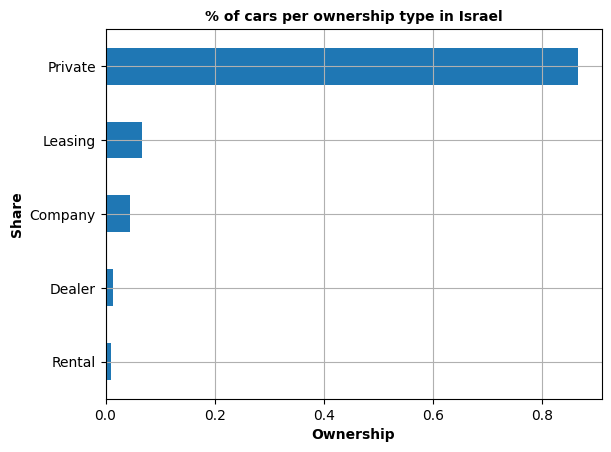

In [ ]:
#creating a horizontal bar chart
ownership['share'].plot.barh()

#adding some more information to the plot to make it easy-readable
plt.title('% of cars per ownership type in Israel', fontsize=10, fontweight='bold')
plt.xlabel('Ownership', fontsize=10, fontweight='bold')
plt.ylabel('Share', fontsize=10, fontweight='bold')
plt.grid()
plt.show()

#####  Conclusion:
    Most of the cars (around 85%) are private ones. 4 other groups take up to 15% all together.

In [ ]:
data_merged_raw.head()

,vehicle_number,manufacturer_code,model_type,manufacturer_name,model_code,model_name,maturity_level,safety_upgrade_status,emission_group,manufacture_year,chassis_model,last_test_date,validity_date,ownership,frame,color_code,vehicle_color,front_axle,rear_axle,fuel_type,registration_instruction,road_entry_date,commercial_name,front_axle_load_code,rear_axle_load_code,front_axle_speed_code,rear_axle_speed_code,towing_capability,brand,country,car_age
0,7993778,481,P,Hyundai Korea,15,DH41C,INSPIRE,NaN,15.0000,2012,G4FG,2024-03-04,2025-03-28,Private,KMHDH41CBCU464082,93,Dark Silver,195/65R15,195/65R15,Gasoline,NaN,2012-03-01,I35,91,91,H,H,No towing hook,Hyundai,South Korea,12
1,2481466,845,P,Hyundai Turkey,72,CM41C,GL,NaN,NaN,2008,G4ED,2024-03-04,2025-03-24,Private,NLHCM41CP8Z096516,25,Silver,185/65R14,185/65R14,Gasoline,NaN,NaT,ACCENT,0,0,NaN,NaN,No towing hook,Hyundai,Turkey,16
2,6120469,253,P,Hyundai Czech Republic,21,DB51D,INSPIRE,NaN,15.0000,2009,G4FC,2024-03-04,2024-09-28,Private,TMADB51DP9J041571,80,White Ivory,185/65R15,NaN,Gasoline,NaN,2009-09-01,I30,88,0,H,H,No towing hook,Hyundai,Czech Republic,15
3,7151374,885,P,Kia Korea,1011,FH2213,LX,NaN,15.0000,2011,G4FC,2024-03-04,2025-02-02,Private,KNAFU411BB5364267,25,Silver,195/65R15,195/65R15,Gasoline,NaN,2011-02-01,FORTE,91,91,H,H,No towing hook,Kia,South Korea,13
4,5410413,299,P,Suzuki Hungary,41,EXB32,GLS,NaN,13.0000,2012,K12B,2024-03-04,2025-02-22,Private,TSMEXB32S00564280,50,Red,185/60R15,185/60R15,Gasoline,NaN,2012-02-01,SPLASH,84,84,H,H,No towing hook,Suzuki,Hungary,12


#### 5.2 Emission group

In [ ]:
# An interactive line graph with plotly
emission_group = data_merged_raw.groupby(['manufacture_year','emission_group'])['vehicle_number'].count().to_frame().\
                        rename(columns={'vehicle_number': 'count_cars'}).reset_index()

emission_group = emission_group[emission_group['manufacture_year'] != 2024]

#creating a list of unique values for sorting
sorted_groups = sorted(emission_group['emission_group'].unique())

# Creating an interactive line graph with Plotly Express
fig = px.line(emission_group,
              x='manufacture_year',  # Year on the X-axis
              y='count_cars',        # Count of cars on the Y-axis
              color='emission_group',  # Different lines for each emission group
              title='Count of Cars by Manufacture Year and Emission Group',
              labels={'count_cars': 'Count of Cars', 'manufacture_year': 'Manufacture Year',
                      'emission_group': 'Emission Group'},
              category_orders={'emission_group': sorted_groups})

# Update layout for title and labels
fig.update_layout(
    title={
        'text': 'Count of Cars by Manufacture Year and Emission Group',
        'y': 0.9,  # You can adjust the position with y
        'x': 0.5,  # Centering the title using x
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'family': 'Arial',  # Font family
            'size': 24,         # Font size
            'color': 'black'    # Font color
        }
    },
    xaxis_title={
        'font': {
            'family': 'Helvetica',  # Font family
            'size': 18,             # Font size
            'color': 'blue'         # Font color
        }
    },
    yaxis_title={
        'font': {
            'family': 'Helvetica',
            'size': 18,
            'color': 'blue'
        }
    }
)
# Show the plot
fig.show()

#####  2 conclusions can be made:
    1. There is a general trend on improving in terms of pulluting by looking at 10.0-15.0 emission groups
    (the number of cars with higher emission group goes down along the years)
    2. There is a trend on improving in terms of the polluting situation of new cars (emission groups 1.0-5.0),
    although a lot is left to be desired

#### 5.3 Model types

In [ ]:
model_types = data_merged_raw.groupby('model_type')['vehicle_number'].count().to_frame().reset_index()
model_types

,model_type,vehicle_number
0,M,181961
1,P,3658805


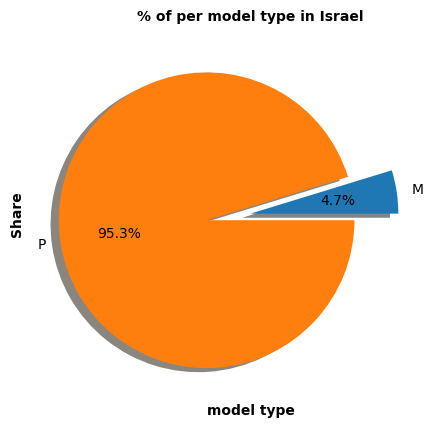

In [ ]:
labels = ['M', 'P']

explode = (0, 0.3)

fig, ax = plt.subplots()
ax.pie(model_types['vehicle_number'], labels=labels, explode = explode, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=0)

plt.title('% of per model type in Israel', fontsize=10, fontweight='bold')
plt.xlabel('model type', fontsize=10, fontweight='bold')
plt.ylabel('Share', fontsize=10, fontweight='bold', labelpad=30)

plt.show()

#####  Conclusion:
    Most likely M stands for mechanical gear and P for Automotive one. No explanation for those was found

#### 5.4 Distribution on car manufacturer year

In [ ]:
#le'ts build a pie chart showing the distribution of ownership
manufacture_year = data_merged_raw[data_merged_raw['manufacture_year']!=2024].\
        groupby('manufacture_year')['vehicle_number'].count().to_frame().rename(columns={'vehicle_number': 'count_cars'})

manufacture_year['share'] = manufacture_year['count_cars'].apply(lambda x: x/manufacture_year['count_cars'].sum())
manufacture_year.sort_values(by='share', ascending=True, inplace=True)
manufacture_year.reset_index(inplace=True)
manufacture_year.sort_values(by='manufacture_year', inplace=True)

manufacture_year.head()

,manufacture_year,count_cars,share
0,1996,725,0.000193
1,1997,1891,0.000503
2,1998,3760,0.001001
3,1999,5871,0.001563
4,2000,7958,0.002118


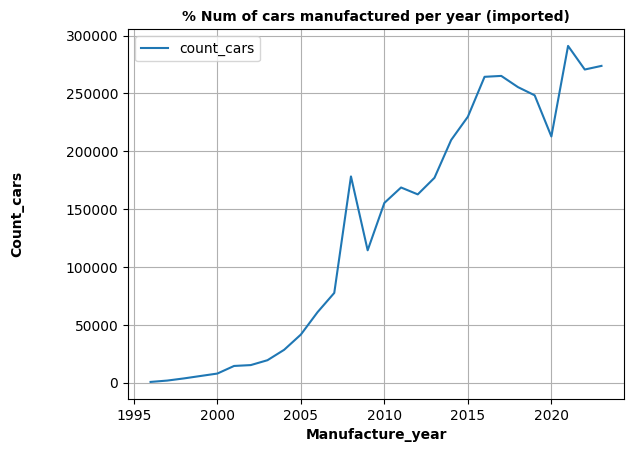

In [ ]:
manufacture_year.plot.line(x='manufacture_year', y='count_cars')

plt.title('% Num of cars manufactured per year (imported)', fontsize=10, fontweight='bold')
plt.xlabel('Manufacture_year', fontsize=10, fontweight='bold')
plt.ylabel('Count_cars', fontsize=10, fontweight='bold', labelpad=30)
plt.grid()
plt.show()

#####  Conclusion: (2024 was removed from the dataset in order to keep it consistant)
    1. It can be seen the the number of cars imported grows continually
    2. There is a peak in 2008 with some extra import (a little bit weird)
    3. There is a drop in 2020, as it seams, due to beginning of the Corona, but then it went up sharply.
    

#### 5.5 Car age distribution in Israel  (now - manufacturer_year (1 for cars of year 2024)

In [ ]:
# let's add a new column with car age
data_merged_raw['car_age'] = data_merged_raw['manufacture_year'].apply(lambda x: 1 if x == 2024 else 2024 - x)

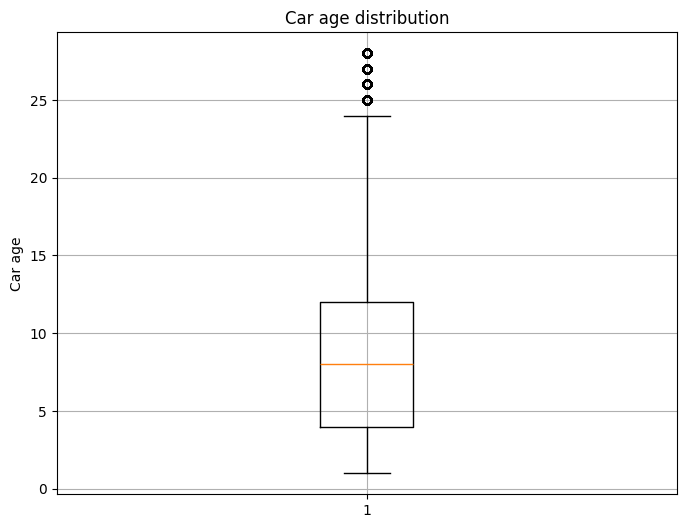

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_merged_raw['car_age'])
plt.title('Car age distribution')
plt.ylabel('Car age')
plt.grid(True)
plt.show()

#####  Conclusion: (cars with year of 2024 were assigned with value 1, for the rest it is a difference between year no and manufacture year)
    1. 25% of the vehicles are 1-4 years old
    2. 50% of the vehicles are between 4 and 12 years old
    3. 75% of the vehicles are 12 year old ones or newer

#### 5.6 Let's descover how many cars went onto road annually and monthly and find top 10 by years and months it happend

In [ ]:
#let's convert the road_entry_date into date object
data_merged_raw['road_entry_date'] = pd.to_datetime(data_merged_raw['road_entry_date'], format='%Y-%m')

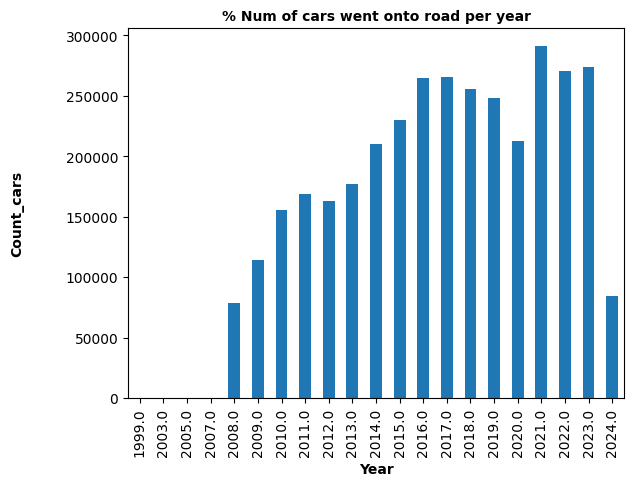

In [ ]:
#count per years
data_merged_raw.groupby(data_merged_raw['road_entry_date'].dt.year)['road_entry_date'].count().plot.bar()

plt.title('% Num of cars went onto road per year', fontsize=10, fontweight='bold')
plt.xlabel('Year', fontsize=10, fontweight='bold')
plt.ylabel('Count_cars', fontsize=10, fontweight='bold', labelpad=30)
plt.show()


#####  Conclusion:
    1. Year 2024 wasn't removed from the data and isn't representative here
    2. A stron trend in growing the number of cars going onto roads from year to year
    3. 7The year with most cars that went onto roads is 2021 (probably recovery after the Corona began)

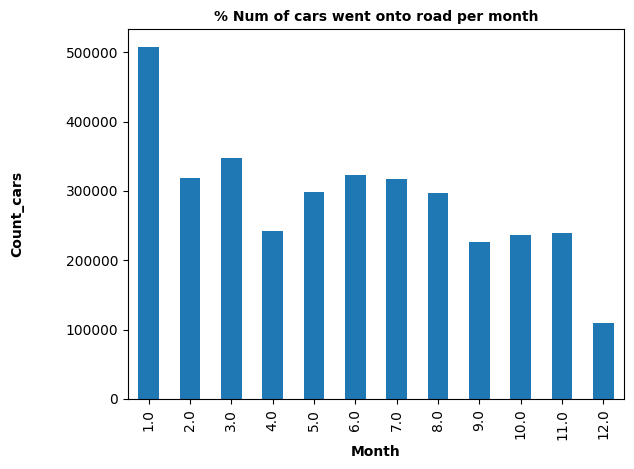

In [ ]:
#count per month
data_merged_raw.groupby(data_merged_raw['road_entry_date'].dt.month)['road_entry_date'].count().plot.bar()

plt.title('% Num of cars went onto road per month', fontsize=10, fontweight='bold')
plt.xlabel('Month', fontsize=10, fontweight='bold')
plt.ylabel('Count_cars', fontsize=10, fontweight='bold', labelpad=30)
plt.show()


#####  Conclusion:
    1. Strangely enough, the month overall time perdiond with most cars that went onto road is January, the least - December
    2. Some similarity can be see along summer and autumn months

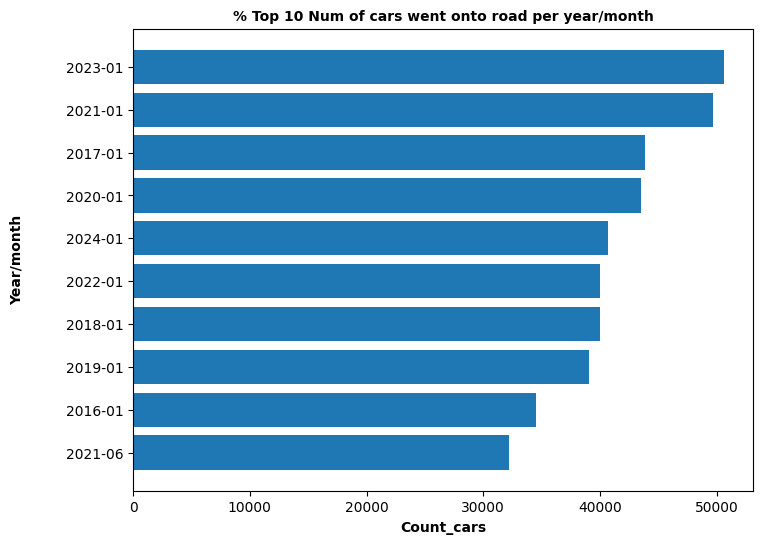

In [ ]:
#count per year-month, top 10
year_months = data_merged_raw.groupby(data_merged_raw['road_entry_date'].dt.strftime('%Y-%m'))['vehicle_number'].\
                    count().to_frame().rename(columns={'vehicle_number':'count_vehicles'}).\
                    sort_values(by='count_vehicles', ascending=False).reset_index().head(10).sort_values(by='count_vehicles',\
                                                                                                            ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(year_months['road_entry_date'], year_months['count_vehicles'])

plt.title('% Top 10 Num of cars went onto road per year/month', fontsize=10, fontweight='bold')
plt.xlabel('Count_cars', fontsize=10, fontweight='bold')
plt.ylabel('Year/month', fontsize=10, fontweight='bold', labelpad=30)
plt.show()

#####  Conclusion:
    1. It can be seen that not only is January the most popular month for getting cars on to road, but it happenes every
        year starting from 2016 (for top 10 year-month periods) apart from year 2021

#### 5.7 Distribution per color

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
colors = data_merged_raw.groupby('vehicle_color')['vehicle_number'].count().reset_index().\
                        rename(columns={'vehicle_number':'count_colors'})

colors['share'] = colors['count_colors'].apply(lambda x: x/colors['count_colors'].sum())
colors.sort_values(by='share', ascending=False, inplace=True)


colors.head(10)

,vehicle_color,count_colors,share
95,White Ivory,1481254,0.3857
86,Silver,323600,0.0843
64,Metallic Silver,304834,0.0794
3,Black,268168,0.0698
48,Metallic Black,183133,0.0477
35,Grey,182719,0.0476
57,Metallic Grey,159601,0.0416
22,Dark Grey,90391,0.0235
23,Dark Metallic Grey,83106,0.0216
4,Blue,67104,0.0175


In [ ]:
colors.shape

(97, 3)

In [ ]:
#cumulative sum
colors['cumulative_share'] = colors['share'].cumsum()
colors.head(10)

,vehicle_color,count_colors,share,cumulative_share
95,White Ivory,1481254,0.3857,0.3857
86,Silver,323600,0.0843,0.4699
64,Metallic Silver,304834,0.0794,0.5493
3,Black,268168,0.0698,0.6191
48,Metallic Black,183133,0.0477,0.6668
35,Grey,182719,0.0476,0.7144
57,Metallic Grey,159601,0.0416,0.7559
22,Dark Grey,90391,0.0235,0.7795
23,Dark Metallic Grey,83106,0.0216,0.8011
4,Blue,67104,0.0175,0.8186


#####  Conclusion:
    1. It can be seen that White Ivory takes up 38.5% of all the data (pretty obvious)
    2. Silver and Metallic Silver around 16.5% together
    3. Black and Metallic Black almost 12%
    4. Grey, Metallic Grey and Dark Grey take up around 10%
    5. Lastly, Blue takes up 1.8%
    5. Top 10 above-mentioned colors take up 82% of the data

##### 5.8 Fuel types

In [ ]:
# An interactive line graph with plotly
emission_group = data_merged_raw.groupby(['manufacture_year','fuel_type'])['vehicle_number'].count().to_frame().\
                        rename(columns={'vehicle_number': 'count_cars'}).reset_index()

emission_group = emission_group[emission_group['manufacture_year'] != 2024]

#creating a list of unique values for sorting
sorted_groups = sorted(emission_group['fuel_type'].unique())

# Creating an interactive line graph with Plotly Express
fig = px.line(emission_group,
              x='manufacture_year',  # Year on the X-axis
              y='count_cars',        # Count of cars on the Y-axis
              color='fuel_type',  # Different lines for each fuel_type
              title='Count of Cars by Manufacture Year and fuel_type',
              labels={'count_cars': 'Count of Cars', 'manufacture_year': 'Manufacture Year',
                      'fuel_type': 'fuel_type'},
              category_orders={'emission_group': sorted_groups})

# Update layout for title and labels
fig.update_layout(
    title={
        'text': 'Count of Cars by Manufacture Year and fuel_type',
        'y': 0.9,  # You can adjust the position with y
        'x': 0.5,  # Centering the title using x
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'family': 'Arial',  # Font family
            'size': 24,         # Font size
            'color': 'black'    # Font color
        }
    },
    xaxis_title={
        'font': {
            'family': 'Helvetica',  # Font family
            'size': 18,             # Font size
            'color': 'blue'         # Font color
        }
    },
    yaxis_title={
        'font': {
            'family': 'Helvetica',
            'size': 18,
            'color': 'blue'
        }
    }
)
# Show the plot
fig.show()

In [ ]:
data_merged_raw.groupby('fuel_type')['manufacture_year'].count()

fuel_type
Diesel                         394920
Electric                       109683
GPL                             19517
Gasoline                      3252986
Hybrid (Electric/Diesel)          960
Hybrid (Electric/Gasoline)      62700
Name: manufacture_year, dtype: int64

#####  Conclusion:
    1. At the moment there isn't a clear trend on the number of Gasoline cars going down
    2. There is a lsight trend in the number of Diesel vihecles going down
    3. There is a clear trend in the number of Electric/Hybrid cars going up
    

##### 5.9 safety_upgrade_status

In [ ]:
# An interactive line graph with plotly
safety_upgrade_status = data_merged_raw.groupby(['manufacture_year','safety_upgrade_status'])['vehicle_number'].count().to_frame().\
                        rename(columns={'vehicle_number': 'count_cars'}).reset_index()

safety_upgrade_status = safety_upgrade_status[safety_upgrade_status['manufacture_year'] != 2024]

#creating a list of unique values for sorting
sorted_groups = sorted(safety_upgrade_status['safety_upgrade_status'].unique())

# Creating an interactive line graph with Plotly Express
fig = px.line(safety_upgrade_status,
              x='manufacture_year',  # Year on the X-axis
              y='count_cars',        # Count of cars on the Y-axis
              color='safety_upgrade_status',  # Different lines for each fuel_type
              title='Count of Cars by Manufacture Year and safety_upgrade_status',
              labels={'count_cars': 'Count of Cars', 'manufacture_year': 'Manufacture Year',
                      'safety_upgrade_status': 'safety_upgrade_status'},
              category_orders={'safety_upgrade_status': sorted_groups})

# Update layout for title and labels
fig.update_layout(
    title={
        'text': 'Count of Cars by Manufacture Year and safety_upgrade_status',
        'y': 0.9,  # You can adjust the position with y
        'x': 0.5,  # Centering the title using x
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'family': 'Arial',  # Font family
            'size': 24,         # Font size
            'color': 'black'    # Font color
        }
    },
    xaxis_title={
        'font': {
            'family': 'Helvetica',  # Font family
            'size': 18,             # Font size
            'color': 'blue'         # Font color
        }
    },
    yaxis_title={
        'font': {
            'family': 'Helvetica',
            'size': 18,
            'color': 'blue'
        }
    }
)
# Show the plot
fig.show()

#####  Conclusion:
    Unfortunately, due to missing data (it was hopefull something clear could be see),
    it's quite hard to make any conclusions

In [ ]:
data_merged_raw['country'].nunique()

40

##### 5.10 Countries

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
countries = data_merged_raw.groupby('country')['vehicle_number'].count().reset_index().\
                        rename(columns={'vehicle_number':'count_country'})

countries['share'] = countries['count_country'].apply(lambda x: x/countries['count_country'].sum())
countries.sort_values(by='share', ascending=False, inplace=True)


countries.head(10)

,country,count_country,share
16,Japan,855275,0.2227
32,South Korea,641017,0.1669
37,Turkey,416457,0.1084
6,Czech Republic,344827,0.0898
33,Spain,241050,0.0628
11,Germany,204089,0.0531
9,France,160552,0.0418
36,Thailand,135768,0.0353
29,Slovakia,130000,0.0338
4,China,103830,0.0270


In [ ]:
#cumulative sum
countries['cumulative_share'] = countries['share'].cumsum()
countries_list = countries['country'].head(15).tolist()
countries.head(15)

,country,count_country,share,cumulative_share
16,Japan,855275,0.2227,0.2227
32,South Korea,641017,0.1669,0.3896
37,Turkey,416457,0.1084,0.4980
6,Czech Republic,344827,0.0898,0.5878
33,Spain,241050,0.0628,0.6506
11,Germany,204089,0.0531,0.7037
9,France,160552,0.0418,0.7455
36,Thailand,135768,0.0353,0.7808
29,Slovakia,130000,0.0338,0.8147
4,China,103830,0.0270,0.8417


In [ ]:
# An interactive line graph with plotly
for_countries = data_merged_raw[data_merged_raw['country'].isin(countries_list)]

country = for_countries.groupby(['manufacture_year','country'])['vehicle_number'].count().to_frame().\
                        rename(columns={'vehicle_number': 'count_cars'}).reset_index()

country = country[country['manufacture_year'] != 2024]

#creating a list of unique values for sorting
sorted_groups = countries_list

# Creating an interactive line graph with Plotly Express
fig = px.line(country,
              x='manufacture_year',  # Year on the X-axis
              y='count_cars',        # Count of cars on the Y-axis
              color='country',  # Different lines for each fuel_type
              title='Count of Cars by Manufacture Year and country',
              labels={'count_cars': 'Count of Cars', 'manufacture_year': 'Manufacture Year',
                      'country': 'country'},
              category_orders={'country': sorted_groups})

# Update layout for title and labels
fig.update_layout(
    title={
        'text': 'Count of Cars by Manufacture Year and top 15 countries',
        'y': 0.9,  # You can adjust the position with y
        'x': 0.5,  # Centering the title using x
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'family': 'Arial',  # Font family
            'size': 24,         # Font size
            'color': 'black'    # Font color
        }
    },
    xaxis_title={
        'font': {
            'family': 'Helvetica',  # Font family
            'size': 18,             # Font size
            'color': 'blue'         # Font color
        }
    },
    yaxis_title={
        'font': {
            'family': 'Helvetica',
            'size': 18,
            'color': 'blue'
        }
    }
)
# Show the plot
fig.show()

#####  Conclusion:
    1. Japan remains to be the most common supplier of vehicles to Israel with a peak in 2008 and 96K cars, but later on
        we see the number of cars coming from Japan going down
    2. There is a sharp raise of cars coming from China from 2020
    3. South Korea keeps growing starting from 2010
    4. The number of vehicles coming from Turkey is dropping and apparently will drop even more

##### 5.10 Brands, what's the brand with highest number of cars and the lowest number of cars (top 10 and lower 10)?

In [ ]:
brands_data = data_merged_raw.groupby(['brand', 'commercial_name'])['vehicle_number'].\
                              count().reset_index().rename(columns={'vehicle_number':'count'})
top_10_brand_commercial_name = brands_data.sort_values(by='count', ascending=False)
top_10_brand_commercial_name.head(10)

,brand,commercial_name,count
3625,Toyota,COROLLA,146047
1778,Kia,PICANTO,113164
1967,Mazda,MAZDA 3,104971
1789,Kia,SPORTAGE,86123
3430,Skoda,OCTAVIA,72152
1571,Hyundai,I10,69167
1572,Hyundai,I20,68180
1609,Hyundai,TUCSON,67044
2781,Mitsubishi,OUTLANDER,60650
1965,Mazda,MAZDA 2,59590


In [ ]:
top_10_brand_commercial_name.tail(10)

,brand,commercial_name,count
258,Audi,TTS COUPRE,1
119,Audi,AUDI A8,1
2315,Mercedes-Benz,EQB 350 4MATIC,1
2313,Mercedes-Benz,EQB 250,1
3489,SsangYong,קורנדו אוט' R3 DTS,1
2309,Mercedes-Benz,EQA 300 4MATIC,1
2307,Mercedes-Benz,E63AMG,1
2306,Mercedes-Benz,E63 AMG,1
2299,Mercedes-Benz,E450 4M COUPE,1
2305,Mercedes-Benz,E63 4MATIC PLUS,1


##### 5.10.1 Top 10 brands top count unque models

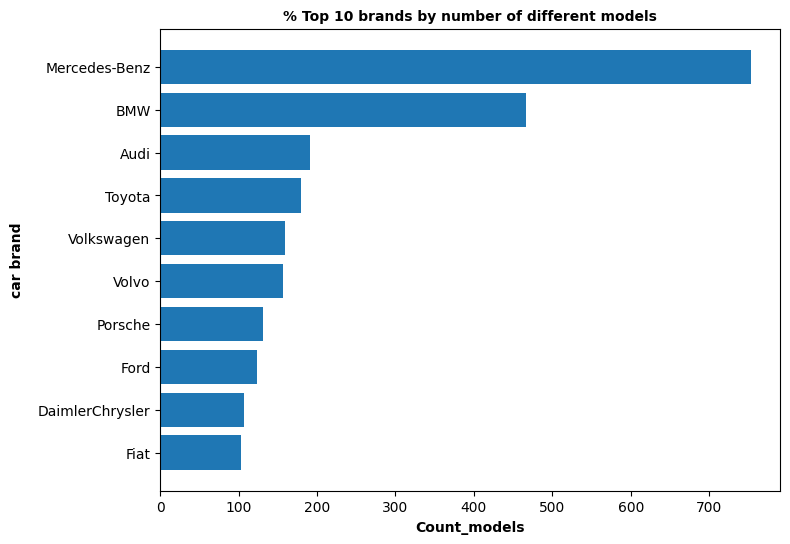

In [ ]:
brands_data_models = data_merged_raw.groupby('brand')['commercial_name'].\
                              nunique().reset_index().rename(columns={'commercial_name':'count'})
brands_data_models = brands_data_models.sort_values(by='count', ascending=False)
top_10 = brands_data_models.head(10).sort_values(by='count', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(top_10['brand'], top_10['count'])

plt.title('% Top 10 brands by number of different models', fontsize=10, fontweight='bold')
plt.xlabel('Count_models', fontsize=10, fontweight='bold')
plt.ylabel('car brand', fontsize=10, fontweight='bold', labelpad=10)
plt.show()

In [ ]:
brands_data_models.tail(10)

,brand,count
40,Hummer,1
70,ORA,1
41,Hummer GM,1
1,ASWUM,1
50,LTA,1
54,Leapmotor,1
75,Pontiac,1
74,Polestar,1
57,Link & Co,1
0,AIWAYS,1


##### 5.11 Let's get back to Emissions and it's the final look at the data

In [ ]:
#let's drop the rows with emissions equal null
data_emissions =data_merged_raw[~data_merged_raw['emission_group'].isna()].copy()

In [ ]:
# let's create a new column with emission group, such as low emission, medium emission, high emission
def emission_convert(x):
    if type(x) not in (int, float):
        return 'other'
    elif x>=1 and x<=5:
        return 'low_emission'
    elif x>5 and x<=10:
        return 'medium_emission'
    else:
        return 'high_emission'

data_emissions['emission_group_grouped'] = data_emissions['emission_group'].\
            apply(lambda x: emission_convert(x))

In [ ]:
#checking what we got
data_emissions['emission_group_grouped'].value_counts()

emission_group_grouped
high_emission      2553040
low_emission        479819
medium_emission     400965
Name: count, dtype: int64

In [ ]:
#checking top 10 countries with highest number of vehicles with highest polution group
data_emissions[data_emissions['emission_group_grouped']=='high_emission'].\
                groupby('country')['vehicle_number'].count().to_frame().reset_index().\
                rename(columns={'vehicle_number':'count'}).sort_values(by='count', ascending=False).head(10)

,country,count
15,Japan,579082
28,South Korea,402553
6,Czech Republic,271060
33,Turkey,220301
29,Spain,186615
11,Germany,151723
26,Slovakia,112234
9,France,84954
12,Hungary,82503
32,Thailand,67967


In [ ]:
#checking top 10 car brands with highest number of vehicles with highest polution group
data_emissions[data_emissions['emission_group_grouped']=='high_emission'].\
                groupby('brand')['vehicle_number'].count().to_frame().reset_index().\
                rename(columns={'vehicle_number':'count'}).sort_values(by='count', ascending=False).head(10)

,brand,count
28,Hyundai,355348
33,Kia,292757
44,Mazda,233124
62,Toyota,201979
57,Skoda,156846
46,Mitsubishi,125626
48,Nissan,124248
61,Suzuki,101346
63,Volkswagen,91558
56,SEAT,82995


In [ ]:
#checking top 10 car models with highest number of vehicles with highest polution group
data_emissions[data_emissions['emission_group_grouped']=='high_emission'].\
                groupby('commercial_name')['vehicle_number'].count().to_frame().reset_index().\
                rename(columns={'vehicle_number':'count'}).sort_values(by='count', ascending=False).head(10)

,commercial_name,count
626,COROLLA,107173
1397,MAZDA 3,101044
1869,SPORTAGE,85112
1544,PICANTO,81559
1977,TUCSON,63192
1523,OUTLANDER,59931
1503,OCTAVIA,53756
1163,I30,47934
1159,I10,46479
878,FOCUS,42882


# [Presentation](https://docs.google.com/presentation/d/1N1-bKMHax0ABKZTPdnSliOE17miEdmiY/edit?usp=drive_link)